In [72]:
cd /Users/mehdi/Documents/WorkingFolder/PHd/weight_vector_simulations_paper/weight_vector_estim_code/

/Users/mehdi/Dropbox/working folder/PHd/weight_vector_simulations_paper/weight_vector_estim_code


In [14]:
from dictionary_generator import DictionaryGenerator
from tools import mle_bic
from algorithm import WeightEstimator
import numpy as np
n_pdf = 10000
x_span = np.linspace(-3,3,n_pdf)

In [74]:
cd /Users/mehdi/Documents/WorkingFolder/PHd/phd-clustering-models/tools/

/Users/mehdi/Dropbox/working folder/PHd/phd-clustering-models/tools


In [560]:
from gm_tools import gaussian_mixture_sample, gm_params_generator, best_cont_matrix
weights, centers, cov = gm_params_generator(3,2)
X, Y = gaussian_mixture_sample(weights, centers, cov, 100)


In [ ]:
from sklearn.preprocessing import StandardScaler
from scipy.stats import multivariate_normal
n_pdf = 10000
sc = StandardScaler()

In [569]:
#Generate the dictionary
dg = DictionaryGenerator(kmeans_k=2, max_pca_comp=2, subspace_cluster_dim=2)
densities_dict = dg.fit_transform(X)

In [570]:
cl = WeightEstimator(densities_dict=densities_dict)
X = sc.fit_transform(X)
cl.fit(X)
weight = cl.pi_final


In [ ]:
f_weight_estim = f = np.array([weight.dot(np.array([d.pdf(x) for d in densities_dict])) for x in x_span])

In [ ]:
X.shape

In [ ]:
from pypmc.density.mixture import create_gaussian_mixture, create_t_mixture


In [412]:
from pypmc.sampler.importance_sampling import ImportanceSampler
from pypmc.tools.indicator import merge_function_with_indicator
from pypmc.tools.indicator import hyperrectangle
# define indicator
ind_lower = [-3 for _ in range(X.shape[1])]
ind_upper = [3 for _ in range(X.shape[1])]
ind = hyperrectangle(ind_lower, ind_upper)

sampler = ImportanceSampler(gauss_mixture.evaluate, gauss_mixture, ind)
sampler.run(100)

In [401]:
gauss_mixture = create_gaussian_mixture(centers, cov, weights)
N = 1000
#samples = gauss_mixture.propose(N)
res = np.sqrt(1./N*np.apply_along_axis(f_em_bic_over_f_star,1, samples).sum())
print res
print np.sqrt(1./N*np.array([f_em_bic_over_f_star(x) for x in samples]).sum())

ValueError: axis must be less than arr.ndim; axis=1, rank=0.

In [561]:
from sklearn.mixture import GaussianMixture
gmm = GaussianMixture(2)
gmm.fit(X)

GaussianMixture(covariance_type='full', init_params='kmeans', max_iter=100,
        means_init=None, n_components=2, n_init=1, precisions_init=None,
        random_state=None, reg_covar=1e-06, tol=0.001, verbose=0,
        verbose_interval=10, warm_start=False, weights_init=None)

In [525]:
import matplotlib.pyplot as plt
x_span = np.linspace(-3,3,n_pdf)
y = np.array([f_em_bic_pdf(x) for x in x_span])
y_star = np.array([f_star_pdf(x) for x in x_span])

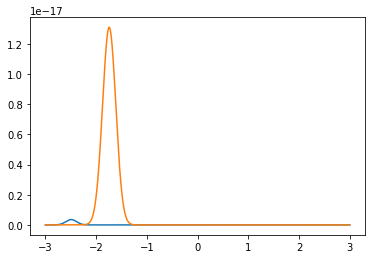

In [526]:
plt.plot(x_span, y)
plt.plot(x_span, y_star)

In [217]:
%matplotlib inline

In [310]:
np.sqrt(np.linalg.norm([(f_em_bic_pdf(x) - f_star_pdf(x))**2 for x in samples]))

739.61236981409093

In [466]:
def integrand(x):
    return (f_star_pdf(x) - f_em_bic_pdf(x))**2
from scipy.integrate import quad
print np.sqrt((quad(integrand, -3,3)[0]))

0.0521305044371


In [269]:
integrand(0)

8.5348376037028376e-57

In [285]:
%timeit np.array([f_em_bic_over_f_star(x) for x in samples]).sum()

1 loop, best of 3: 1.29 s per loop


In [311]:

gmm.weights_.dot(np.array([multivariate_normal(gmm.means_[i], gmm.covariances_[i]).pdf(x) for i in range(len(gmm.weights_))])

array([  2.25808342,  15.70105318,   6.94726026])

In [501]:
def f_estim_pdf(x):
    return weight.dot(np.array([d.pdf(x) for d in densities_dict]))

def f_star_pdf(x):
    return weights.dot(np.array([multivariate_normal(centers[i], cov[i]).pdf(x) for i in range(len(weights))]))

def f_estim_over_f_star(x):
    return (1-f_estim_pdf(x)/f_star_pdf(x))**2*f_star_pdf(x)

def f_em_bic_pdf(x):
    return gmm.weights_.dot(np.array([multivariate_normal(gmm.means_[i], gmm.covariances_[i]).pdf(x) for i in range(len(gmm.weights_))]))

def f_estim_over_f_star(x):
    return (1-f_estim_pdf(x)/f_star_pdf(x))**2*f_star_pdf(x)


def f_em_bic_over_f_star(x):
    return (1-f_em_bic_pdf(x)/f_star_pdf(x))**2*f_star_pdf(x)

In [563]:
from pypmc.density.mixture import create_gaussian_mixture
from pypmc.sampler.importance_sampling import ImportanceSampler
from pypmc.tools.indicator import merge_function_with_indicator
from pypmc.tools.indicator import hyperrectangle

def l2_norm(f_over_g, f_sample, sample_size=10000, hypercube_size = 3):
    """
    Compute the L2 norm of f-g using importance sampling
    with sample_size samples drawn from a gaussian mixture f_sample from pypmc
    """
    # define indicator
    ind_lower = [-hypercube_size for _ in range(X.shape[1])]
    ind_upper = [hypercube_size for _ in range(X.shape[1])]
    ind = hyperrectangle(ind_lower, ind_upper)
    sampler = ImportanceSampler(f_sample.evaluate, f_sample, ind)
    sampler.run(sample_size)
    samples = sampler.samples
    return np.sqrt(1./sample_size*np.apply_along_axis(f_over_g, 1, samples[0]).sum())

In [564]:
gauss_mixture = create_gaussian_mixture(centers, cov, weights)

In [573]:
print l2_norm(f_estim_over_f_star, gauss_mixture, sample_size=1000)
print l2_norm(f_em_bic_over_f_star, gauss_mixture, sample_size=1000)

4.44294044262
0.639050983223


In [566]:
x_sizes= range(100,1000, 100)+range(1000,10000, 1000)+[20000, 50000]
y_sizes = []
for s in x_sizes:
    y_sizes.append(l2_norm(f_em_bic_over_f_star, gauss_mixture, sample_size=s))

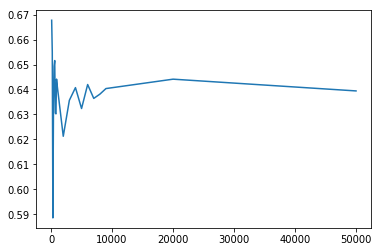

In [567]:
plt.plot(x_sizes, y_sizes)

In [515]:
def integrand(x):
    return (f_star_pdf(x) - f_em_bic_pdf(x))**2
from scipy.integrate import quad
print np.sqrt((quad(integrand, -3,3)[0]))

1.06745856821


In [467]:
from pypmc.sampler.importance_sampling import ImportanceSampler
from pypmc.tools.indicator import merge_function_with_indicator
from pypmc.tools.indicator import hyperrectangle
# define indicator
ind_lower = [-3 for _ in range(X.shape[1])]
ind_upper = [3 for _ in range(X.shape[1])]
ind = hyperrectangle(ind_lower, ind_upper)

In [486]:
N = 1000
sampler = ImportanceSampler(gauss_mixture.evaluate, gauss_mixture, ind)
sampler.run(N)
samples = sampler.samples

In [487]:
print np.sqrt(1./N*np.apply_along_axis(f_em_bic_over_f_star,1, samples[0]).sum())

0.0524209244972


In [475]:
gauss_mixture = create_gaussian_mixture(centers, cov, weights)
print np.sqrt(1./N*np.apply_along_axis(f_em_bic_over_f_star,1, gauss_mixture.propose(N)).sum())

0.0519422044052


In [437]:
np.array([f_em_bic_over_f_star(x) for x in samples])

[[ 1.40176987 -0.06119781]
 [ 1.49770452  0.25812354]
 [ 1.41412611 -0.01173837]
 [ 1.48020017  0.10273025]
 [ 1.55952122  0.26885483]
 [ 1.35731555 -0.00647277]
 [ 1.47809994 -0.04861322]
 [ 1.51416688  0.38248812]
 [ 1.44819816  0.18408681]
 [-2.2423325   1.40622074]]


array([[ 0.00458511,  0.1039521 ,  0.00061473,  0.01118943,  0.04933051,
         0.18036315,  0.31994257,  0.11525949,  0.03837436,  0.26895914]])

In [438]:
[x for x in samples]

[array([[ 1.40176987, -0.06119781],
        [ 1.49770452,  0.25812354],
        [ 1.41412611, -0.01173837],
        [ 1.48020017,  0.10273025],
        [ 1.55952122,  0.26885483],
        [ 1.35731555, -0.00647277],
        [ 1.47809994, -0.04861322],
        [ 1.51416688,  0.38248812],
        [ 1.44819816,  0.18408681],
        [-2.2423325 ,  1.40622074]])]

In [443]:
samples[0]

array([[ 1.40176987, -0.06119781],
       [ 1.49770452,  0.25812354],
       [ 1.41412611, -0.01173837],
       [ 1.48020017,  0.10273025],
       [ 1.55952122,  0.26885483],
       [ 1.35731555, -0.00647277],
       [ 1.47809994, -0.04861322],
       [ 1.51416688,  0.38248812],
       [ 1.44819816,  0.18408681],
       [-2.2423325 ,  1.40622074]])

In [576]:
cd ../../weight_vector_simulations_paper/weight_vector_estim_code/

/Users/mehdi/Dropbox/working folder/PHd/weight_vector_simulations_paper/weight_vector_estim_code


In [10]:
from simu_clustering import simu, IntegrandKLDensity, IntegrandL2Density, GaussianMixtureGen, GaussMixtureDensity
from pypmc.density.mixture import create_gaussian_mixture
import numpy as np
from tools import l2_norm, kl_norm, mle_bic

In [3]:
simu(10000, 10, 20)

9959.08809285 10440.6104705
32.8867518902 22.3159849644


1

In [12]:
weights = np.array([0.1, 0.5, 0.4])
N = 100
gg = GaussianMixtureGen(3, weights)
centers_star, cov_star = gg.get_params()
f_star = GaussMixtureDensity(weights, centers_star, cov_star)
X = gg.sample(N)
f_star_sampling = create_gaussian_mixture(centers_star, cov_star, weights)


NameError: name 'np' is not defined

In [20]:
_, em_model = mle_bic(X, 20)
em_density = GaussMixtureDensity(em_model.weights_, em_model.means_, em_model.covariances_)
em_integrand = IntegrandKLDensity(f_star.pdf, em_density.pdf)
em_kl = kl_norm(em_integrand.pdf, f_star_sampling, sample_size=100000)
    

In [38]:
kl_norm(em_integrand.pdf, f_star_sampling, sample_size=100000)

0.54832412999274771

In [21]:
from scipy.stats import entropy
from numba import jit

In [23]:
X_sampling = gg.sample(10000)

In [35]:
entropy(np.apply_along_axis(em_density.pdf, 1, X_sampling), np.apply_along_axis(f_star.pdf, 1, X_sampling))

0.072640821962738855

In [36]:
X_sampling

array([[ 0.05158604,  0.01824782,  1.06131003],
       [ 0.0019761 , -0.07120068,  0.99849581],
       [ 0.00293066,  0.96839019, -0.0656894 ],
       ..., 
       [-0.11560889, -0.05205911,  1.0677704 ],
       [-0.03154399, -0.07063102,  0.98032618],
       [-0.12094504,  1.10751967, -0.04375684]])

In [41]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


[autoreload of simu_clustering failed: Traceback (most recent call last):
  File "/usr/local/lib/python2.7/site-packages/IPython/extensions/autoreload.py", line 247, in check
    superreload(m, reload, self.old_objects)
ImportError: cannot import name KdeCV
]


In [1]:
from simu_clustering import simu, IntegrandKLDensity, kl_norm

/usr/local/lib/python2.7/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/usr/local/lib/python2.7/site-packages/sklearn/grid_search.py:43: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


In [6]:
kl_aggreg_density, em_density, f_star, f_star_sampling = simu(100, 8, 5)

L2 loss, KL-aggreg, EM, KDE: 4.7608166172, 4.74205355414, 4.77421114324
KL loss, KL-aggreg, EM, KDE: 3.30459448676, 3.87216949549, 3.07630287005
Times, KL-aggreg, EM, KDE: 0.125766992569, 0.215951919556, 0.102691173553


In [7]:
X_s = f_star_sampling.propose(1000)

In [2]:
from os import listdir
from os.path import isfile, join
import pickle

In [3]:
if __name__ == '__main__':
    simu_folder = "dg_2017-07-03_20.20.47"
    folder = "/Users/mehdi/Downloads/"+simu_folder+"/"
    onlyfiles = [f for f in listdir(folder) if (isfile(join(folder, f)) and f.startswith("res_K"))]
res = []
for f in onlyfiles:
    res.append(pickle.load(open(folder+f)))

In [4]:
import pandas as pd

In [5]:
df = pd.DataFrame(res)

In [11]:
df

,EM_KL,EM_l2,EM_time,K,KdeCV_KL,KdeCV_l2,KdeCV_time,MLE_KL,MLE_l2,MLE_time,N,p
0,6.384932,65.937733,1.041024,4,7.591001,66.194766,3.265548,6.942765,65.278003,0.304126,1000,3
1,5.756488,64.616622,1.126704,4,6.047827,66.097349,3.298321,5.995720,65.606686,0.163888,1000,3
2,6.486268,66.104421,1.023427,4,6.646495,65.529013,3.293730,6.326753,65.090207,0.167262,1000,3
3,6.171642,66.082704,1.056880,4,6.462119,65.137747,3.265774,6.214325,65.732085,0.298111,1000,3
4,6.282526,65.663049,1.198301,4,7.515625,65.600524,3.240592,6.757555,65.587110,0.310937,1000,3
5,6.422509,65.167892,0.432742,4,6.579802,65.827120,1.621617,6.582880,65.400718,0.128510,1000,3
6,6.306756,64.999460,0.495199,4,7.654281,65.776162,1.623168,6.462674,65.347592,0.154670,1000,3
7,6.384932,65.937733,1.034412,4,7.591001,66.194766,3.249080,6.942765,65.278003,0.272152,1000,3
8,6.611340,66.543002,0.917856,4,7.539931,65.409583,3.247358,7.173001,66.161705,2.188284,1000,3
9,6.486268,66.104421,1.021629,4,6.646495,65.529013,3.306712,6.326753,65.090207,0.134764,1000,3


In [6]:
import matplotlib.pyplot as plt
from matplotlib import rc
import seaborn as sns
%matplotlib inline

In [17]:
def retrieve_type(row):
    type_row = row["variable"]
    loss = row["value"]
    N = row["N"]
    method = "None"
    if "KL" in type_row:
        metric = "KL"
    else:
        metric = "L2"
    if ("MLE" in type_row):
            method = "MLE"
    if "Kde" in type_row:
                method = "KDE CV"
    if "EM" in type_row:
            method = "EM-BIC"
    return pd.Series({"metric":metric, "method": method, "loss": loss, "N": N})

In [14]:
#Heu, glitch du nnotebook ?
def retrieve_time_temp(row):
    type_row = row["variable"]
    time = row["value"]
    N = row["N"]
    method = "None"
    if ("MLE" in type_row):
            method = "MLE"
    if "Kde" in type_row:
                method = "KDE CV"
    if "EM" in type_row:
            method = "EM-BIC"
    return pd.Series({ "method": method, "time": time, "N": N})

In [35]:
def basic_plot_res(df, K, p, metric):
    df2 = df[(df.K==K) & (df.p==p)]
    drop_list = [key for key in df2.columns if "time" in key]+["K", "p"]
    df2 = df2.drop(drop_list, axis=1)
    df3 = pd.melt(df2, id_vars=["N"])
    df4 = df3.apply(retrieve_type, axis=1)
    plt.figure(figsize=(10,5))
    boxplot = sns.boxplot(x="method", y="loss", hue="N", data=df4[df4.metric == metric],
                         palette=["#ff6666", "#ffd966", "#b3ff66"])
    for patch in boxplot.artists:
        r, g, b, a = patch.get_facecolor()
        patch.set_facecolor((r, g, b, 1))
    boxplot.set_xlabel('')
    #boxplot.set_ylabel("log of time in s")
    sns_plot = boxplot.get_figure()
    for ax in sns_plot.get_axes():
        ax.set_yscale('log')
    sns_plot = boxplot.get_figure()
    #times
    df2 = df[(df.K==K) & (df.p==p)]
    times = [key for key in df2.columns if "time" in key]+["N"]
    df2 = df2[times]
    df3 = pd.melt(df2, id_vars=["N"])
    df4 = df3.apply(retrieve_time, axis=1)
    plt.figure(figsize=(10,5))
    boxplot = sns.boxplot(x="method", y="time", hue="N", data=df4,
                         palette=["#ff6666", "#ffd966", "#b3ff66"])
    for patch in boxplot.artists:
        r, g, b, a = patch.get_facecolor()
        patch.set_facecolor((r, g, b, 1))
    boxplot.set_xlabel('')
    #boxplot.set_ylabel("log of time in s")
    sns_plot = boxplot.get_figure()
    #for ax in sns_plot.get_axes():
        #ax.set_yscale('log')
    sns_plot = boxplot.get_figure()


In [36]:
    simu_list = [
        (2,2,100),
        (4,2,100),
        (4,2,500),
        (4,5,100),
        (4,5,500),
        (4,5,1000),
        (10,5,100),
        (10,5,500),
        (10,5,1000),
        (10,20,500),
        (10,20,1000)
    ]

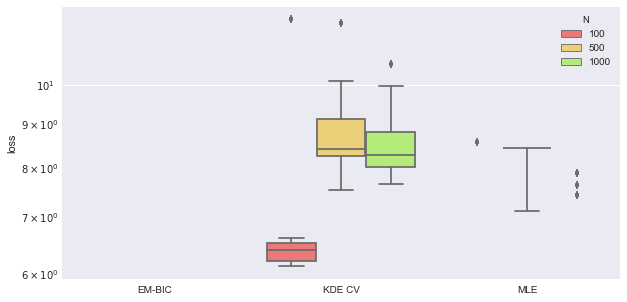

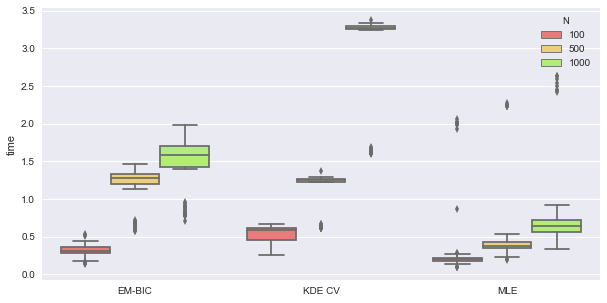

In [39]:
basic_plot_res(df, 4, 5, "KL")

In [61]:
from tools import GaussianMixtureGen
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np

In [137]:
K = 4
gg = GaussianMixtureGen(K, 1./K*np.ones(K))
X = gg.sample(1000)

In [81]:
#rotate the data
theta = np.radians(30)
c, s = np.cos(theta), np.sin(theta)
R = np.matrix('{} {}; {} {}'.format(c, -s, s, c))
X= np.array(X.dot(R))
print X

[[-0.15607367 -0.03127129]
 [ 0.05500659  0.10765707]
 [ 0.01726621  0.03167665]
 ..., 
 [-0.2263817  -0.13825811]
 [ 0.33242369  0.74851352]
 [ 0.05730946 -0.1106412 ]]


In [126]:
X

array([[ 0.0033796 ,  0.07269803, -0.0177834 , ...,  1.03375667,
         0.91539055, -0.05080328],
       [-0.04371137, -0.16724577, -0.03045555, ...,  0.82519353,
        -0.13361099,  0.25340798],
       [ 0.00280469,  0.15403672, -0.05091007, ...,  0.87412092,
         1.08110109,  1.11474507],
       ..., 
       [ 0.08444668, -0.04999241, -0.06282847, ...,  0.85240633,
         1.19409445, -0.03195388],
       [-0.05723322, -0.16680666, -0.09019408, ...,  0.92047048,
         0.13480717,  1.03697891],
       [ 0.04346588, -0.13713021,  0.09836553, ...,  0.08978586,
         0.14912118, -0.15059337]])

In [152]:
from sklearn.decomposition import PCA
pc = PCA(2)
X_pca = pc.fit_transform(X)
comps = pc.components_
pc1 = K*comps[0]
pc2 = K*comps[1]
print comps

[[ 0.00878199  0.00709787 -0.8195301  -0.57292487]
 [ 0.00570897 -0.01112799  0.57289294 -0.81953478]]


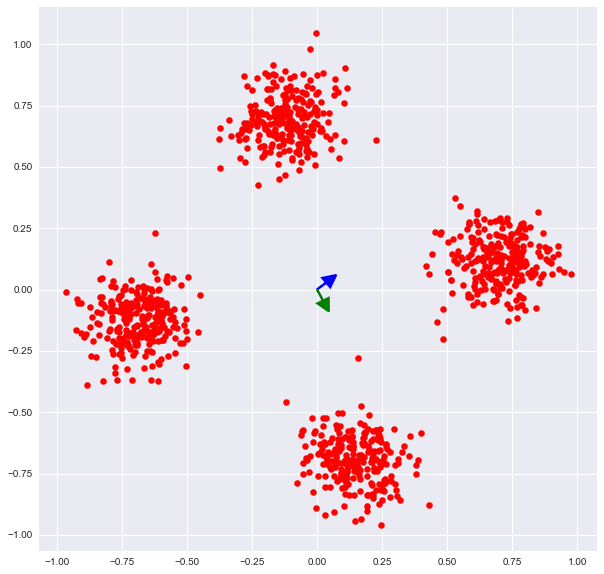

In [154]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111)
#plt.xlim(-1, 1.5)
#plt.ylim(-0.5, 1.5)
#plt.zlim(-1,2)
x,y = X_pca[:,0], X_pca[:,1]
ax.scatter(x, y , c = 'red', marker = '.', linewidth = 3)
ax.arrow(0, 0, pc1[0], pc1[1], lw = 2, head_width=0.05, head_length=0.05, fc='b', ec='b')
ax.arrow(0, 0, pc2[0], pc2[1], lw = 2, head_width=0.05, head_length=0.05, fc='g', ec='g')
plt.show()

In [140]:
eigval, eigvect =  np.linalg.eig(1./X.shape[0]*X.T.dot(X))

In [159]:
comps

array([[ 0.00878199,  0.00709787, -0.8195301 , -0.57292487],
       [ 0.00570897, -0.01112799,  0.57289294, -0.81953478]])

In [155]:
def select_eigvals(eigval):
    return np.array([e for e in eigval if e > 2.858*np.median(eigval)])

In [156]:
select_eigvals(eigval)

array([ 0.78185354])

In [157]:
4./np.sqrt(3)

2.3094010767585034

In [158]:
np.median(eigval)

0.12936662843105581